# APIs with Keys

Install `python-dotenv` by uncommenting and running the line below:

In [ ]:
#%pip install python-dotenv


In [2]:
from requests import get 
import pandas as pd 
import numpy as np
from dotenv import dotenv_values, find_dotenv

# API Keys
Many times, data providers don't want to provide access to their APIs to just anybody. In order to make sure that they control access and track usage of the API, they might require the use of an API key. An API key is basically like a password that is uniquely associated with your account that you use every time you want to use that API.

# New York Times API

One example of an API that requires a key is the New York Times API. We'll show an example of using the New York Times API to make the API call.
<div class="alert alert-block alert-danger">
<b>NOTE: An API key is like a password</b>. So you should avoid sharing it with anyone else. Your key should never be readable in the text of a homework or classwork submission. 

Instead, we'll store keys in an external file, and then read them in to Python and store them in a variable. That way, we can use the API key in our code without having to include the text anywhere that might be visible to someone else. 

<small>(Admittedly, its unlikely that anyone would want to steal your completely free New York Times API key, but other API keys may grant access to sensitive data. We want to establish good security habits here, so go ahead and pretend this is a valuable piece of information even though it isn't)</small>
</div>

## Getting a key



We need to get an API key from the New York Times first before we can access the API. You'll need to follow the steps below to get everything set up.

1. Go to their Dev Portal to sign up and get access: https://developer.nytimes.com/apis. You'll need to make an account, then log in. 
2. Once you're logged in, go to `https://developer.nytimes.com/my-apps/new-app` (or just select your name at the top right and select "Apps"). Name your Application something like BSOS326APP, and give it a brief description (you can just say it's "App for a class"). Then scroll down and hit the "enable" buttons on all of the APIs listed. Finally, hit the "Save" button at the bottom of the page.
3. You'll end up on a page that has some information on the app you created. Your key is in the section called "API Keys". It will just be a long string of letters and numbers:

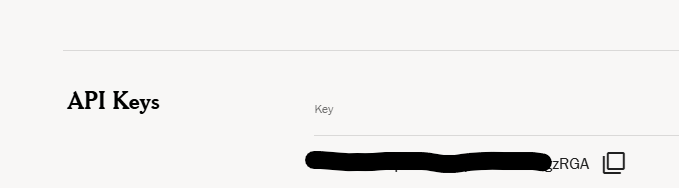

4. Once you have your key, go to the top level directory for this class in Jupyter Hub and locate the file called `keys.env`. You'll put your NYT API key on the line that says `nyt_api_key = 'YOUR API KEY HERE.'`
 Your key should still be written in single quotes, so, if my key was `1231asd34##a12`, that line of my `keys.env` file would look like: `nyt_api_key = '1231asd34##a12'`



Going forward, any time you need to use an API key in an assignment, you can access it by running something like the code below:


``` python
# after running: from dotenv import dotenv_values, find_dotenv
keys = dotenv_values(find_dotenv('keys.env', usecwd=True)) # import the keys as a python dictionary

my_example_api_key = keys['example_api_key'] # selecting a specific key from the dictionary

```

This will import a dictionary called `keys` that contains any of your stored API keys, which you can then access using the same methods you would normally use to access specific values from any other Python dictionary.

<h4 style="color:red;font-weight:bold"> Question 1: Do the steps described above and write your api key in the <code>keys.env</code> file in the appropriate spot in the project directory. Then create a variable called <code>nyt_key</code> that contains your New York Times API key</h4>

In [3]:
keys = dotenv_values(find_dotenv('keys.env', usecwd=True))
nyt_key = keys['nyt_api_key']



Now you can just put the `nyt_key` variable anywhere you would normally need to input your API key.

# NYT Archives
After you do this, you can poke around on the API site a bit to get an idea of what data is available and how you might access that data. We'll start with the Archives API, for which the documentation can be found here: https://developer.nytimes.com/docs/archive-product/1/overview. The Archives API can be used to access article metadata (such as headline, byline, article URL, and so on) for a given month. Let's try getting the content for January 2019.

Start with a base URL:

In [4]:
base_url = "https://api.nytimes.com/svc/archive/v1/2019/1.json"

Then run the code below to send a get request that adds your API key as a parameter on the URL:

In [5]:
r = get(base_url, params= {'api-key':nyt_key})

Now we can check the status code. Remember that code 200 means everything is fine. When we're sending authentication information, a code of 401 will indicate that our request is not authorized. 

In [6]:
r.status_code

200

We are good to go. Now let's get the content.

In [7]:
json = r.json()  # Convert response to JSON format

<h4 style="color:red;font-weight:bold">Question 2: How many NYT articles were there in January 2019?</h4>



In [8]:
response = r.json()  # Convert response to JSON format
len(response['response']['docs'])

# OR
response['response']['meta']['hits']


4482

<h4 style="color:red;font-weight:bold">Question 3: What are the types of metadata that are available in the data from this API? Show the keys from one article to answer this question.</h4>

In [9]:
response['response']['docs'][0].keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

<h4 style="color:red;font-weight:bold">Question 4: Create a list called <code>abstracts</code> that contains the article abstract for each article in <code>`json`</code></h4>

In [10]:
abstracts = [i['abstract'] for i in response['response']['docs']]

abstracts[1:5]

['Imagine what we could do with our money, and hours, if we set our phones aside for a year.',
 'Wells was a deep threat for the vaunted Oakland offenses of the late 1960s, but his playing days ended after he served a seasonlong prison sentence.',
 'Can the Constitution withstand the partisans?',
 'The Christian right doesn’t like the president only for his judges. They like his style.']

## URL Paths and f-strings


We just retrieved some data for 2019 from the archives API, but what if we wanted to access data from a different time period? Looking back on the code we just ran, the full URL looks something like this:
Following the instructions given on their site, they give an example of a URL that looks something like this:

> `https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key=yourkey`

We can think of this URL as having four different parts:

* `https://` is the protocol or scheme. (This rarely changes)
* `api.nytimes.com` is the domain. This part will be the same for all New York Times API calls.
* `/svc/archive/v1/2019/1.json` is the path. The first part of the path just sends us to Version 1 of the Archive API. `/2019/1` is going to direct us to the data for January 2019. 
* `?api-key=yourkey` All the stuff after the `?` are URL parameters. They'll usually look something like `name = value`. When you're using `request.get` you'll pass these values using a dictionary to the `params` argument.

We already know how to modify a URL parameter using the `params` argument in the `get` function, but getting data from a different time period in this API is going to require us to modify the URL path as well. 

The easiest way to do this is with "formatted string literal" or `f`-string, which is basically a way of referencing Python variables inside a string of text. To give an example of how this works, you can try running the code below:




In [11]:
name = "Neil Lund"

f"My name is {name}"

'My name is Neil Lund'

The `f` in front of the string indicates that it is an f-string, and the text inside of `{}` is replaced with whatever value we've assigned to the `name` variable in Python. Using that same basic logic, we can set up our New York Times API URL so that we can programmatically replace the the month and year values:

In [12]:
month = 10
year = 2020

url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json"

url

'https://api.nytimes.com/svc/archive/v1/2020/10.json'

<h4 style="color:red;font-weight:bold">Question 5A: Use a f-string in a loop to create a list of separate URLs for each month in 2020</h4>
 
 <div class="alert alert-block alert-warning"><strong>(Note: You don't need to send requests, just make the URL here!)</strong></div>


<h4 style="color:red;font-weight:bold">Question 5B: Write a function called <code>nyt_api</code> that has two arguments, month and year, and outputs the response from pulling from the NYT Archive API for that month and year.</h4>

In [13]:
def nyt_api(month, year):
    url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json"
    return get(url, params= {'api-key':nyt_key})
res = nyt_api(1, 2020)

<h4 style="color:red;font-weight:bold">Question 6: Write a function called <code>nyt_headlines</code> that takes a single result from running your <code>nyt_api</code> function from the previous question and returns a list of only the headlines from that result</h4>

## JSON to Pandas DataFrame

If we have nicely formatted JSON data we can often convert it into a more useable pandas data frame with minimal effort by using `pd.DataFrame()`, but keep in mind you may have to do a little indexing first in order to get to the accessible part of the data:

In [ ]:
pd.DataFrame(data.json()['response']['docs']).head()

### Article Search

If you are looking into the New York Times archives, most of the time, you are trying to find articles about a certain topic. That is, you usually don't want to try to sift through all of the articles that the NYT has published. But, you might be interested in how they are covering the election, for example. In that case, you might not want to grab every single article published. Instead, you'd want to do a search on some keywords. To do this, you can use the Article Search API instead.

You can look at the documentation at https://developer.nytimes.com/docs/articlesearch-product/1/overview for more information on how this might work. It is very similar to the Archive API, except we use a slightly different base URL, as well as different parameters. 

In [20]:
article_base = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'

We can specify the keywords using `q` in our parameters. Let's look for articles with the keyword "election".

In [21]:
r = get(article_base, params= {'q':'election','api-key':nyt_key}) 

In [22]:
response_dict =  r.json()
response_dict.keys()

dict_keys(['status', 'copyright', 'response'])

In [23]:
election_articles = r.json()['response']['docs']
len(election_articles)

10

In [ ]:
election_articles[0]

<h4 style="color:red;font-weight:bold">Question 7: Use the NYT Article Search to look for articles about mental health in January 2024. How many articles were there? How does this compare to January 2014?</h4>

In [27]:
r = get(article_base, params= {'q':'mental health','api-key':nyt_key})
mhealth = r.json()

Note that the search only returns 10 articles at a time, but we can increment the `page` parameter to return additional results:

In [29]:
i = 1

article_base = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'
election_parameters = {'q':'election',
                       'page':i,
                       'api-key':nyt_key}

response_page = get(article_base, params= election_parameters).json()
election_articles = response_page['response']['docs']

print("number of total articles: ", response_page['response']['metadata']['hits'],
      "\nnumber of articles retrieved: ", len(election_articles)
      )


number of total articles:  10000 
number of articles retrieved:  10


To narrow our search, we can add filters. For example, you can adjust the begin and end dates of your search to look at specific time periods. Let's take a look at the month of January in 2020. Note that the dates use "YYYYMMDD" formatting. So, January 1, 2020 will be `20200101`. 

In [30]:
election_parameters = {'q':'election',
                       'begin_date':'20200101',
                       'end_date':'20200201',
                       'api-key':nyt_key}

response_jan1 = get(article_base, params= election_parameters).json()
election_articles_jan1 = response_jan1['response']['docs']
election_articles_jan1[0]['web_url']

'https://www.nytimes.com/2020/01/10/technology/facebook-election.html'

## Census API

One extremely useful API in social science research is the **Census API**. This API provides access to a wide variety of data sources on demographics and characteristics of people in the US. It contains data from the Decennial Census, but also from many other sources, such as the American Community Survey (ACS). Information about the Census API can be found at: https://www.census.gov/data/developers/data-sets.html.

As with the New York Times API, you will need to request an API key in order to access it. You can request an API key here: https://api.census.gov/data/key_signup.html. You will need to provide your email address and organization (you can just put University of Maryland), and you should get an email with your census key shortly after that. As with the previous case, you'll want to add it in the appropriate location in your `keys.env` file, then run the code below to assing the census key to a python variable



In [31]:
keys = dotenv_values(find_dotenv('keys.env', usecwd=True))
census_key = keys['census_api_key']

Even within just one data source like the ACS, there are lots of different variables and groupings that you can pull data about. We'll start with the 1-year ACS estimates. Information about this data can be found by navigating to the American Community Survey 1-Year Data page (https://www.census.gov/data/developers/data-sets/acs-1year.html). 

The webpage documentation shows how to access their data as well example code and a list of variables. For example, if you scroll down to the Detailed Tables section, you can find a link to the detailed tables variables (https://api.census.gov/data/2022/acs/acs1/variables.html). The Examples and Supported Geographies page (https://api.census.gov/data/2022/acs/acs1.html) can also be helpful in identifying the data that you want.

To start, let's find something basic: the total number of people in each state. Looking at the variables table, we can see that this is called `B01001_001E` (not very intuitive, I know). Since we want this for every state, we use `state:*` as our `for` parameter. We include `NAME` as a variable we want to get since we want to know what the state names are for each of the counts. Finally, we make sure to include our key.

In [32]:
census_base_url = 'https://api.census.gov/data/2022/acs/acs1'

census_params = {'get':'NAME,B01001_001E', 
                 'for':'state:*',
                 'key':census_key}

r = get(census_base_url, params = census_params)
r.status_code

200

In [33]:
people_by_state = r.json()


Note that the structure of our data here is quite different from what we got from the NYT API. Take a minute to see if you can make sense of the structure of the response.

<h4 style="color:red;font-weight:bold">Question 8: Which states had more than 10,000,000 people in 2022? Create a list that contains the names of these states.</h4>

In [34]:


states_over_10mil = [i[0] for i in people_by_state[1:] if int(i[1])>=10000000]

In [35]:
popdata =[{'state': i[0], 
           'population':int(i[1]), 
           'statecode':i[2]} for i in people_by_state[1:]]

## Using groups in the Census API

If you look at some of the examples provided, you'll notice that they use the `groups` syntax. For example, on the ACS 1-Year estimates page (https://www.census.gov/data/developers/data-sets/acs-1year.html), you can see an example shown as:

    api.census.gov/data/2022/acs/acs1?get=NAME,group(B01001)&for=us:1&key=YOUR_KEY_GOES_HERE

This grabs all of the variables in that group. Variable groups might be something like all Race categories, or Age categories, or combinations thereof. These are helpful if you want to get every breakdown for a certain characteristic.



In [36]:
census_base_url = 'https://api.census.gov/data/2022/acs/acs1'

census_params = {'get':'NAME,group(B02001)', 
                 'for':'state:*',
                 'key':census_key}

r = get(census_base_url, params = census_params)
r.status_code

200

There are a lot of variables here! Note that this includes both estimates as well as the margin of error and any annotations about there. The variables ending in E are the estimates and the ones ending in M are the margin of error, with EA and MA representing annotations on those values. For more information about these annotations, see this page: https://www.census.gov/data/developers/data-sets/acs-1year/notes-on-acs-estimate-and-annotation-values.htmlb

<h4 style="color:red;font-weight:bold">Question 9: Find the breakdown of the number of people by race in Maryland in 2014. Create a dictionary with the race category as the key and the counts as integers for the value.</h4>

Step 1 here would be to find the result for Maryland. One way to do this would be to just change part of `census_params` to only retrieve data for Maryland: changing `'for':'state:*'` to `'for':'state:24'` would accomplish this.

But we've already got the Maryland data in the response we got by running the code chunk above, so we can just work with that. Recall that the first element of the data we get from the census API is a list of variable names. Looking at this, I can see that the first element of the list contains the state name. So, I just need to write a list comprehension, loop, or some other statement that will check this element in each list:

In [61]:
result = r.json()

varnames = result[0]

# verifying: 
print(varnames[0], ": ", result[1][0])


NAME :  Alabama


Here's how you might use a list comprehension to get the data for Maryland:

In [62]:
# OR try using a filter expression with lambda:
# md_data = list(filter(lambda x: x[0]=="Maryland", result))[0]

md_data = [i for i in result if i[0]=="Maryland"][0]
print(md_data)

['Maryland', '6164660', None, '-555555555', '*****', '2983674', None, '13090', None, '1823687', None, '11781', None, '26649', None, '5861', None, '404207', None, '6449', None, '3088', None, '1376', None, '420119', None, '17677', None, '503236', None, '19559', None, '233923', None, '14757', None, '269313', None, '14166', None, '0400000US24', 'Maryland', '24']


Step 2 would be to look at the list of variable names to figure out what each of these values correspond to, and then consult the census documentation (or the table posted on ELMS) to identify what each code means. 

I can use the `zip` function to create a dictionary from the list of variable names and the list of values for Maryland. `zip` will take two equal length lists and turn them into a dictionary where the keys come from list one and the values come from list 2:


In [69]:
md_dict = dict(zip(varnames, md_data))
print(md_dict)

{'NAME': 'Maryland', 'B02001_001E': '6164660', 'B02001_001EA': None, 'B02001_001M': '-555555555', 'B02001_001MA': '*****', 'B02001_002E': '2983674', 'B02001_002EA': None, 'B02001_002M': '13090', 'B02001_002MA': None, 'B02001_003E': '1823687', 'B02001_003EA': None, 'B02001_003M': '11781', 'B02001_003MA': None, 'B02001_004E': '26649', 'B02001_004EA': None, 'B02001_004M': '5861', 'B02001_004MA': None, 'B02001_005E': '404207', 'B02001_005EA': None, 'B02001_005M': '6449', 'B02001_005MA': None, 'B02001_006E': '3088', 'B02001_006EA': None, 'B02001_006M': '1376', 'B02001_006MA': None, 'B02001_007E': '420119', 'B02001_007EA': None, 'B02001_007M': '17677', 'B02001_007MA': None, 'B02001_008E': '503236', 'B02001_008EA': None, 'B02001_008M': '19559', 'B02001_008MA': None, 'B02001_009E': '233923', 'B02001_009EA': None, 'B02001_009M': '14757', 'B02001_009MA': None, 'B02001_010E': '269313', 'B02001_010EA': None, 'B02001_010M': '14166', 'B02001_010MA': None, 'GEO_ID': '0400000US24', 'state': '24'}


From here, we could do something like the code below to create a new dictionary with the correct names and values:

In [147]:
{
 'state' : md_dict["NAME"],
 'White only' : int(md_dict['B02001_002E']),
 'Black or African American' : int(md_dict['B02001_003E'])
     #... repeat for all of the other variables
}

{'state': 'Maryland',
 'White only': 2983674,
 'Black or African American': 1823687}

Better yet, we could set up a simple lookup dictionary and then use a loop or dictionary comprehension to extract the elements we want and give them an appropriate name:

In [121]:
census_vars = {
'B02001_002E':'White only',
'B02001_003E':'Black or African American',
'B02001_004E':'American Indian and Alaska Native',
'B02001_005E':'Asian Alone',
'B02001_006E':'Native Hawaiian and Other Pacific Islander Alone',
'B02001_007E':'Some Other Race Alone',
'B02001_008E':'Two or More Races',
'B02001_009E':'Two races including Some Other Race',
'B02001_010E':'Two races excluding Some Other Race, and three or more races'}

{value:int(md_dict[key]) for key, value in census_vars.items()}

{'White only': 2983674,
 'Black or African American': 1823687,
 'American Indian and Alaska Native': 26649,
 'Asian Alone': 404207,
 'Native Hawaiian and Other Pacific Islander Alone': 3088,
 'Some Other Race Alone': 420119,
 'Two or More Races': 503236,
 'Two races including Some Other Race': 233923,
 'Two races excluding Some Other Race, and three or more races': 269313}

And once you know how to do this for a single case, it should be feasible to figure out a way to do it for all of the data using a loop or list comprehension:

In [129]:

census_data = []
for i in result[1:]:
    state_dict = dict(zip(result[0], i))
    state_data = {}
    state_data['state'] = state_dict['NAME']
    for key, value in census_vars.items():
        state_data[value]  = int(state_dict[key])
    census_data.append(state_data)

# looking at result for Maryland only:
census_data[20]


{'state': 'Maryland',
 'White only': 2983674,
 'Black or African American': 1823687,
 'American Indian and Alaska Native': 26649,
 'Asian Alone': 404207,
 'Native Hawaiian and Other Pacific Islander Alone': 3088,
 'Some Other Race Alone': 420119,
 'Two or More Races': 503236,
 'Two races including Some Other Race': 233923,
 'Two races excluding Some Other Race, and three or more races': 269313}

Or I could define a function and use that in a list comprehension

In [156]:
# make the dictionaries:
all_dict = [dict(zip(result[0],i)) for i in result[1:]]

def state_demographic(state_dict, var_dict):
    # apply the dictionary comprehension
    state_data = {value:int(state_dict[key]) for key, value in var_dict.items()}
    # add the state name as a string
    state_data['state'] = state_dict['NAME']
    return state_data



# comprehension over each one:
census_data = [state_demographic(i, census_vars) for i in all_dict]
census_data[20]


{'White only': 2983674,
 'Black or African American': 1823687,
 'American Indian and Alaska Native': 26649,
 'Asian Alone': 404207,
 'Native Hawaiian and Other Pacific Islander Alone': 3088,
 'Some Other Race Alone': 420119,
 'Two or More Races': 503236,
 'Two races including Some Other Race': 233923,
 'Two races excluding Some Other Race, and three or more races': 269313,
 'state': 'Maryland'}

In any case, once you have your data in a list of dictionaries like this, its easy to transform it into a data frame, which will be important for later on:

In [157]:
df = pd.DataFrame(census_data)
df.head()

,White only,Black or African American,American Indian and Alaska Native,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",state
0,3302528,1302035,24400,78893,4977,102129,259334,98041,161293,Alabama
1,437533,22202,95268,46184,14724,13365,104307,25071,79236,Alaska
2,4254015,340760,301909,266441,15099,751130,1429843,1115009,314834,Arizona
3,2103849,437331,22250,48921,14229,91519,327538,198871,128667,Arkansas
4,15175598,2121422,504589,6054038,159920,7597084,7416691,5472315,1944376,California
